In [213]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(600, 600, 3)
<class 'numpy.ndarray'>


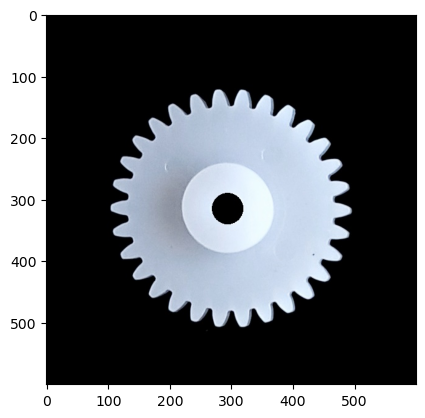

In [214]:
ideal_image=cv.imread('ideal.jpg')
sample2_image=cv.imread('sample2.jpg')
sample3_image=cv.imread('sample3.jpg')
sample4_image=cv.imread('sample4.jpg')
sample5_image=cv.imread('sample5.jpg')
sample6_image=cv.imread('sample6.jpg')

image_with_broken_tooth=cv.imread('sample.jpg')
print(ideal_image.shape)
print(type(ideal_image))
plt.imshow(cv.cvtColor(ideal_image,cv.COLOR_BGR2RGB))

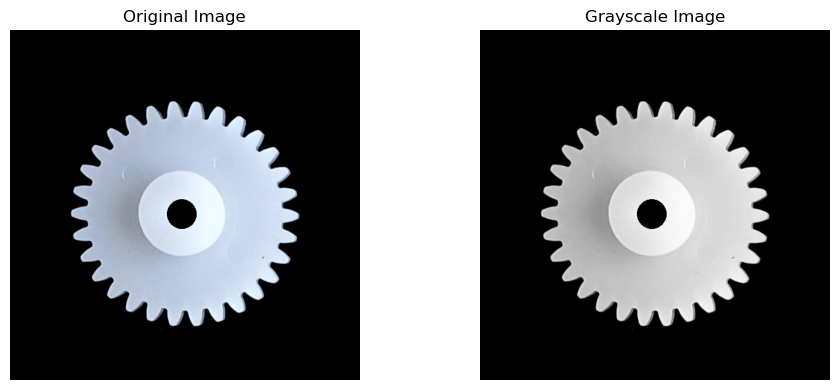

In [215]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ideal_image,cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(ideal_image, cv.COLOR_BGR2GRAY), cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout() 
plt.show()

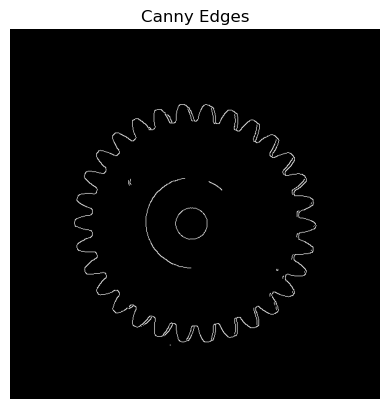

In [216]:
gray_sample1_image=cv.cvtColor(ideal_image, cv.COLOR_BGR2GRAY)
gray_sample2_image=cv.cvtColor(sample2_image, cv.COLOR_BGR2GRAY)
gray_sample3_image=cv.cvtColor(sample3_image, cv.COLOR_BGR2GRAY)
gray_sample4_image=cv.cvtColor(sample4_image, cv.COLOR_BGR2GRAY)
gray_sample5_image=cv.cvtColor(sample5_image, cv.COLOR_BGR2GRAY)
gray_sample6_image=cv.cvtColor(sample6_image, cv.COLOR_BGR2GRAY)

canny=cv.Canny(gray_ideal_img,125,175)
plt.imshow(canny, cmap='gray')  # Displaying the Canny edges
plt.title('Canny Edges')  # Set the title for the plot
plt.axis('off')  # Hide axis labels and ticks
plt.show()

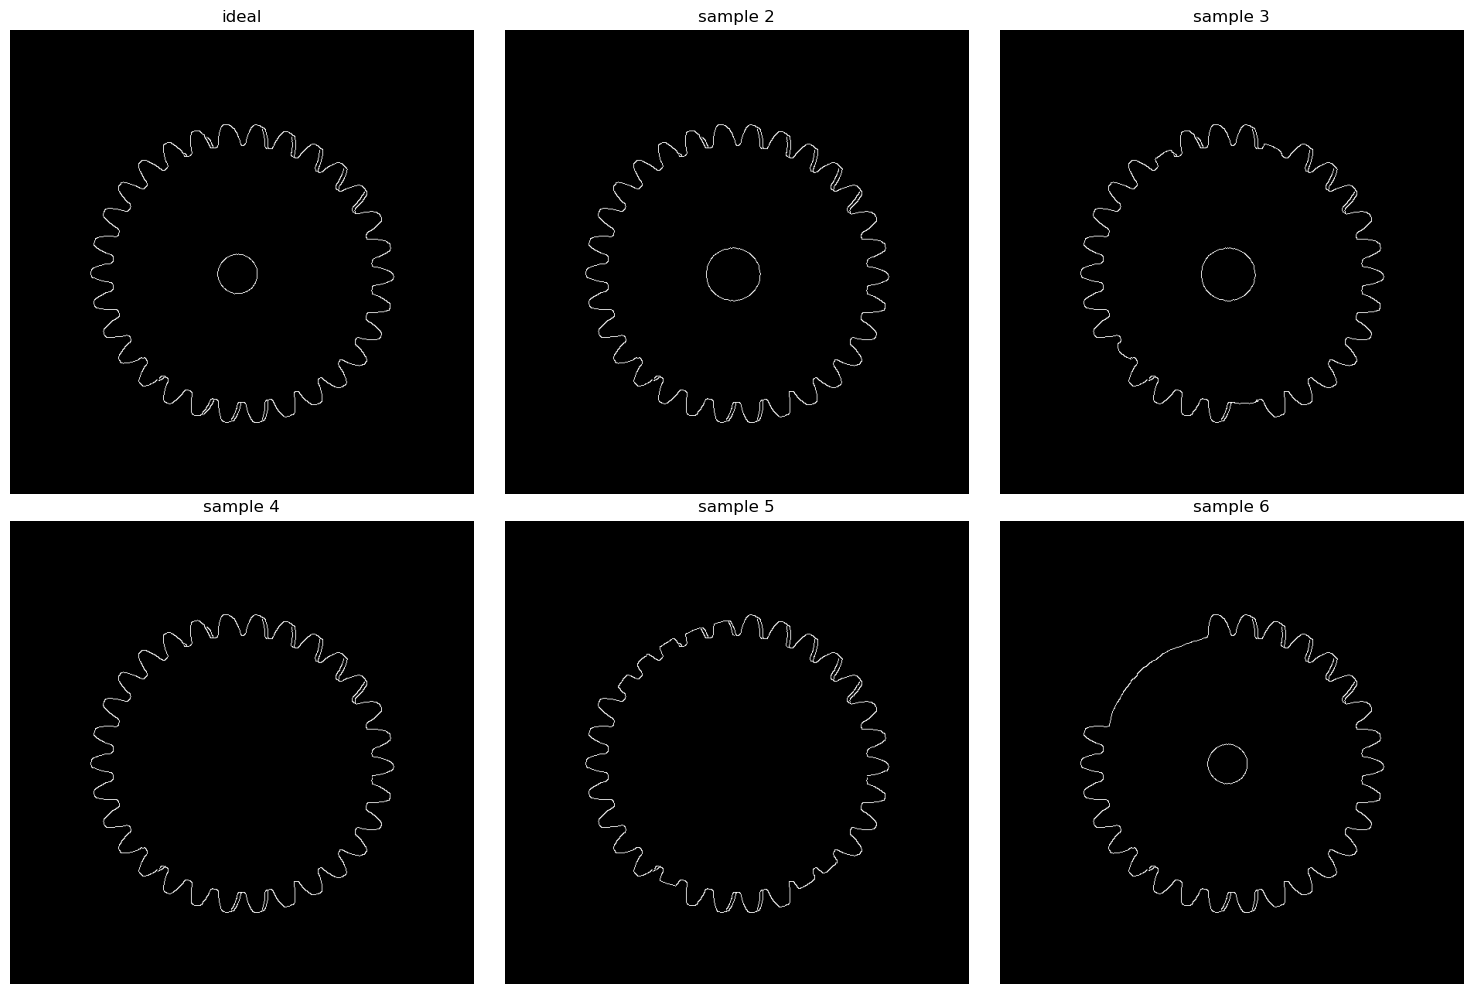

In [217]:
import cv2 as cv
import matplotlib.pyplot as plt

# Your grayscale images
images = [gray_ideal_img, gray_sample2_image, gray_sample3_image, gray_sample4_image, gray_sample5_image, gray_sample6_image]
titles = ['ideal', 'sample 2', 'sample 3', 'sample 4', 'sample 5', 'sample 6']

# List to store Canny edge-detected images
canny_images = []

# Compute Canny edge detection for each image
for img in images:
    edges = cv.Canny(img, 1200, 200)
    canny_images.append(edges)

# Plot the images
plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns
    plt.imshow(canny_images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


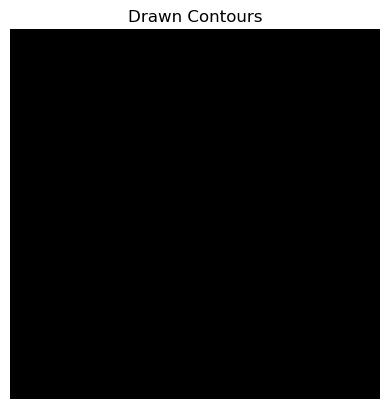

19


In [240]:
#blur=cv.GaussianBlur(gray_sample1_image,(5,5),cv.BORDER_DEFAULT)  
#canny=cv.Canny(blur,1200,200)
import numpy as np
blank = np.zeros_like(img)

ret, thresh = cv.threshold(gray_sample6_image, 125, 255, cv.THRESH_BINARY)

contours , hierarchies = cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(blank,contours,-1,(0,0,255),2)
plt.imshow(blank,cmap='gray')
plt.title('Drawn Contours')
plt.axis('off')
plt.show()

print(len(contours))

Number of contours found: 16


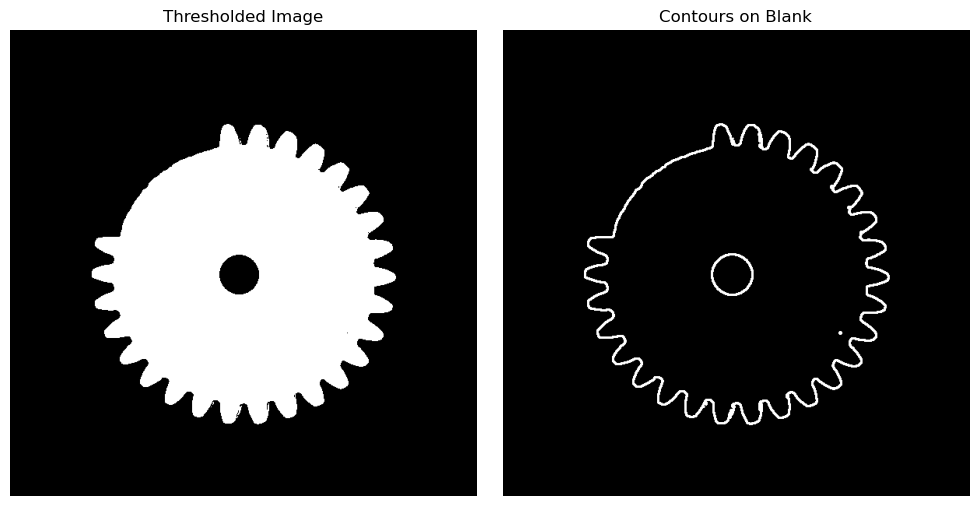

In [243]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming gray_sample6_image is a grayscale image
# Create a blank image with the same shape as gray_sample6_image
blank = np.zeros_like(gray_sample6_image)

# Apply thresholding
ret, thresh = cv.threshold(gray_sample6_image, 120, 255, cv.THRESH_BINARY)

# Check if thresholding worked
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Find contours
contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Check if contours were found
print(f'Number of contours found: {len(contours)}')

# Draw contours on the blank image (using white color for contours)
cv.drawContours(blank, contours, -1, (255), 2)

# Display the image with contours drawn
plt.subplot(1, 2, 2)
plt.imshow(blank, cmap='gray')
plt.title('Contours on Blank')
plt.axis('off')

plt.tight_layout()
plt.show()


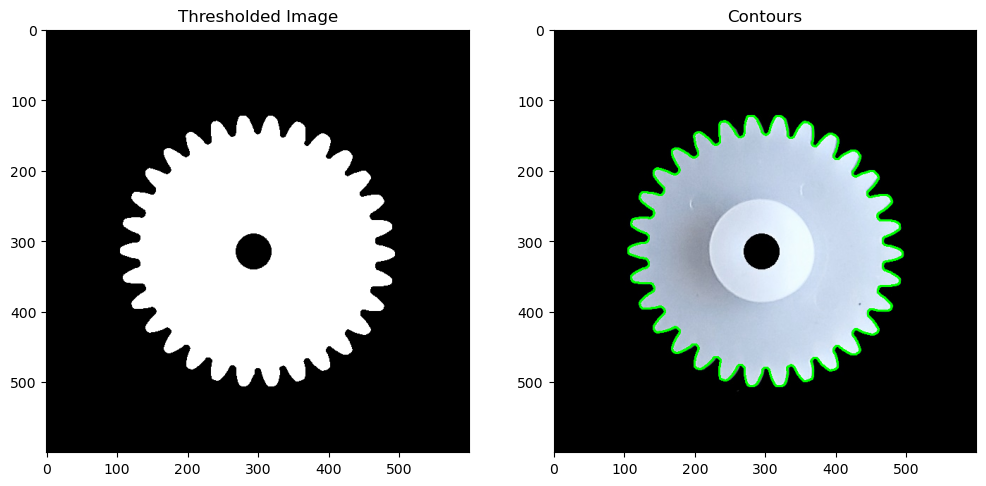

Number of teeth: 1


In [220]:
def count_gears_teeth(image_path):
    # Read the image
    img = cv.imread(image_path)
    
    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and improve thresholding
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    
    # Apply thresholding to get a binary image
    _, thresh = cv.threshold(blurred, 127, 255, cv.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    # Filter out contours that are too small or too large to be considered teeth
    min_contour_area = 100  # Adjust this value as needed
    filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_contour_area]
    
    # Draw contours on the original image (for visualization)
    img_contours = img.copy()
    cv.drawContours(img_contours, filtered_contours, -1, (0, 255, 0), 2)
    
    # Display the images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Thresholded Image')
    plt.imshow(thresh, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title('Contours')
    plt.imshow(cv.cvtColor(img_contours, cv.COLOR_BGR2RGB))
    
    plt.show()
    
    # Return the number of contours
    return len(filtered_contours)

# Example usage
image_path = 'ideal.jpg'
number_of_teeth = count_gears_teeth(image_path)
print(f'Number of teeth: {number_of_teeth}')